# Imports

In [ ]:
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling

import warnings
warnings.filterwarnings('ignore')

# Q1)1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [ ]:
election_data= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [ ]:
election_data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [ ]:
election_data.shape


(1525, 9)

In [ ]:
election_data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
print(election_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB
None


In [ ]:
election_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [ ]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [ ]:
election_data = election_data.replace(replace)

In [ ]:
election_data["gender"].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [ ]:
election_data["vote"].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [ ]:
data = election_data[election_data.duplicated()]
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,0,35,4,4,5,2,3,2,1
627,0,39,3,4,4,2,5,2,1
871,0,38,2,4,2,2,4,3,1
984,1,74,4,3,2,4,8,2,0
1155,1,53,3,4,2,2,6,0,0


In [ ]:
election_data.skew()

vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

# Q2)Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

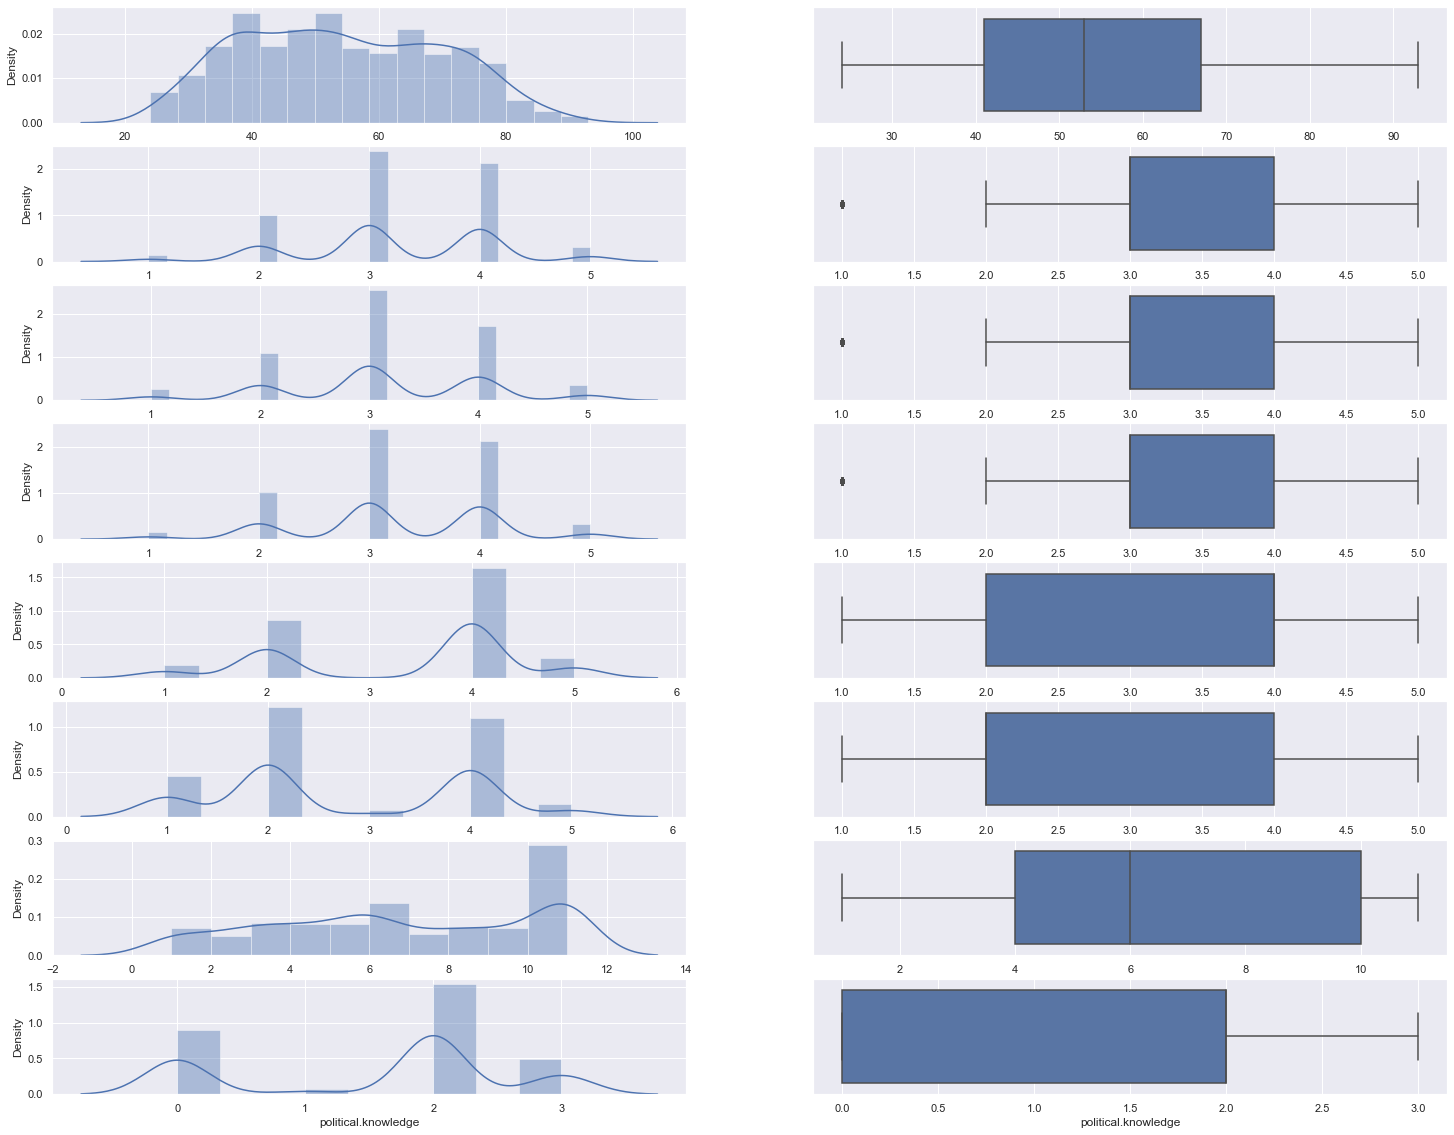

In [ ]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25,20)
sns.distplot(election_data['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election_data, ax=axes[0][1])
sns.distplot(election_data['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election_data , ax=axes[1][1])
sns.distplot(election_data['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election_data, ax=axes[2][1])
sns.distplot(election_data['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=election_data , ax=axes[3][1])
sns.distplot(election_data['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=election_data, ax=axes[4][1])
sns.distplot(election_data['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=election_data , ax=axes[5][1])
sns.distplot(election_data['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=election_data , ax=axes[6][1])
sns.distplot(election_data['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=election_data, ax=axes[7][1])
plt.show()

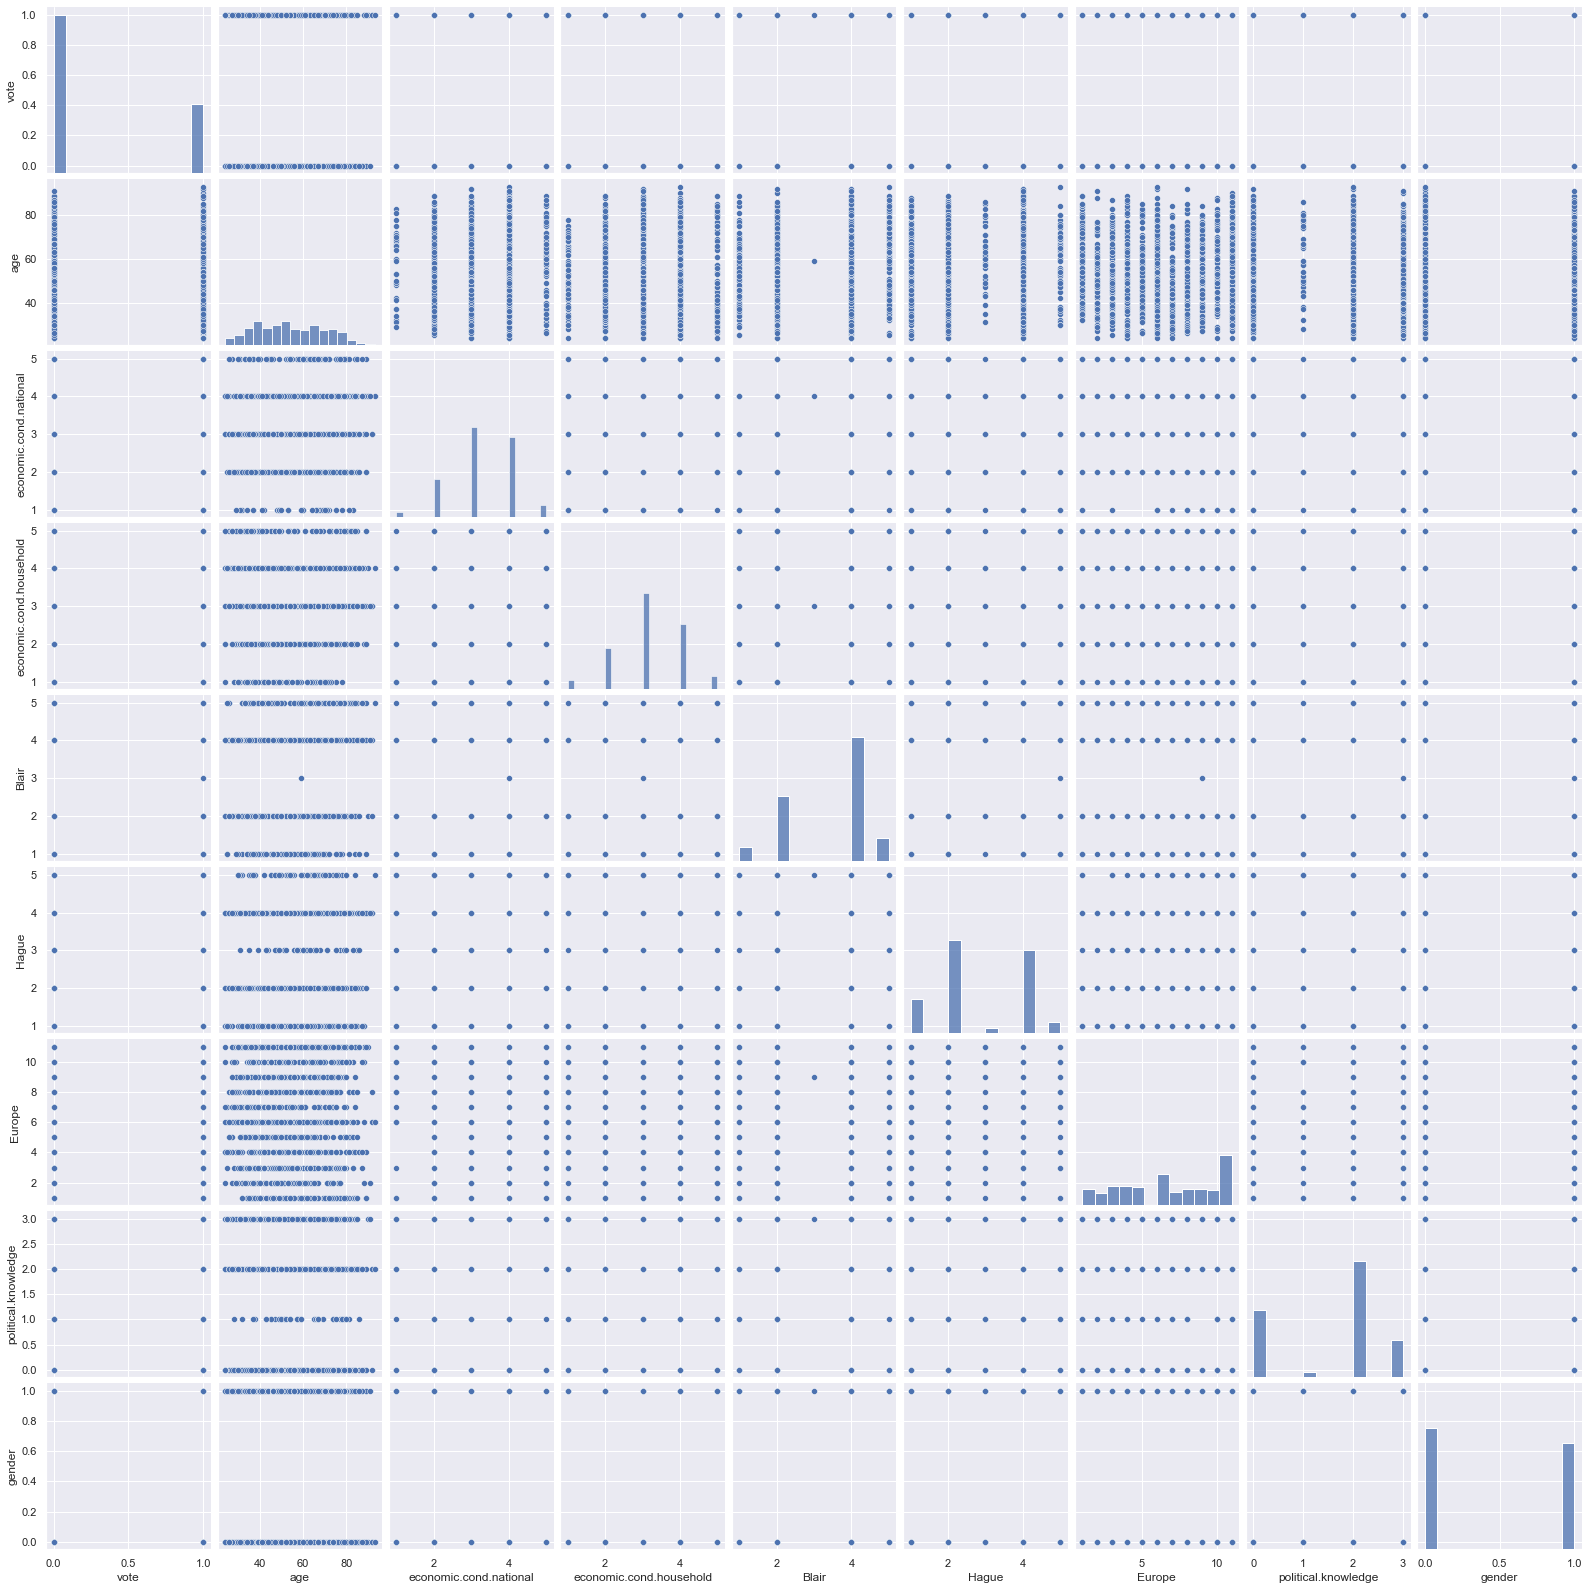

In [ ]:
sns.pairplot(election_data)

<AxesSubplot:xlabel='Hague', ylabel='age'>

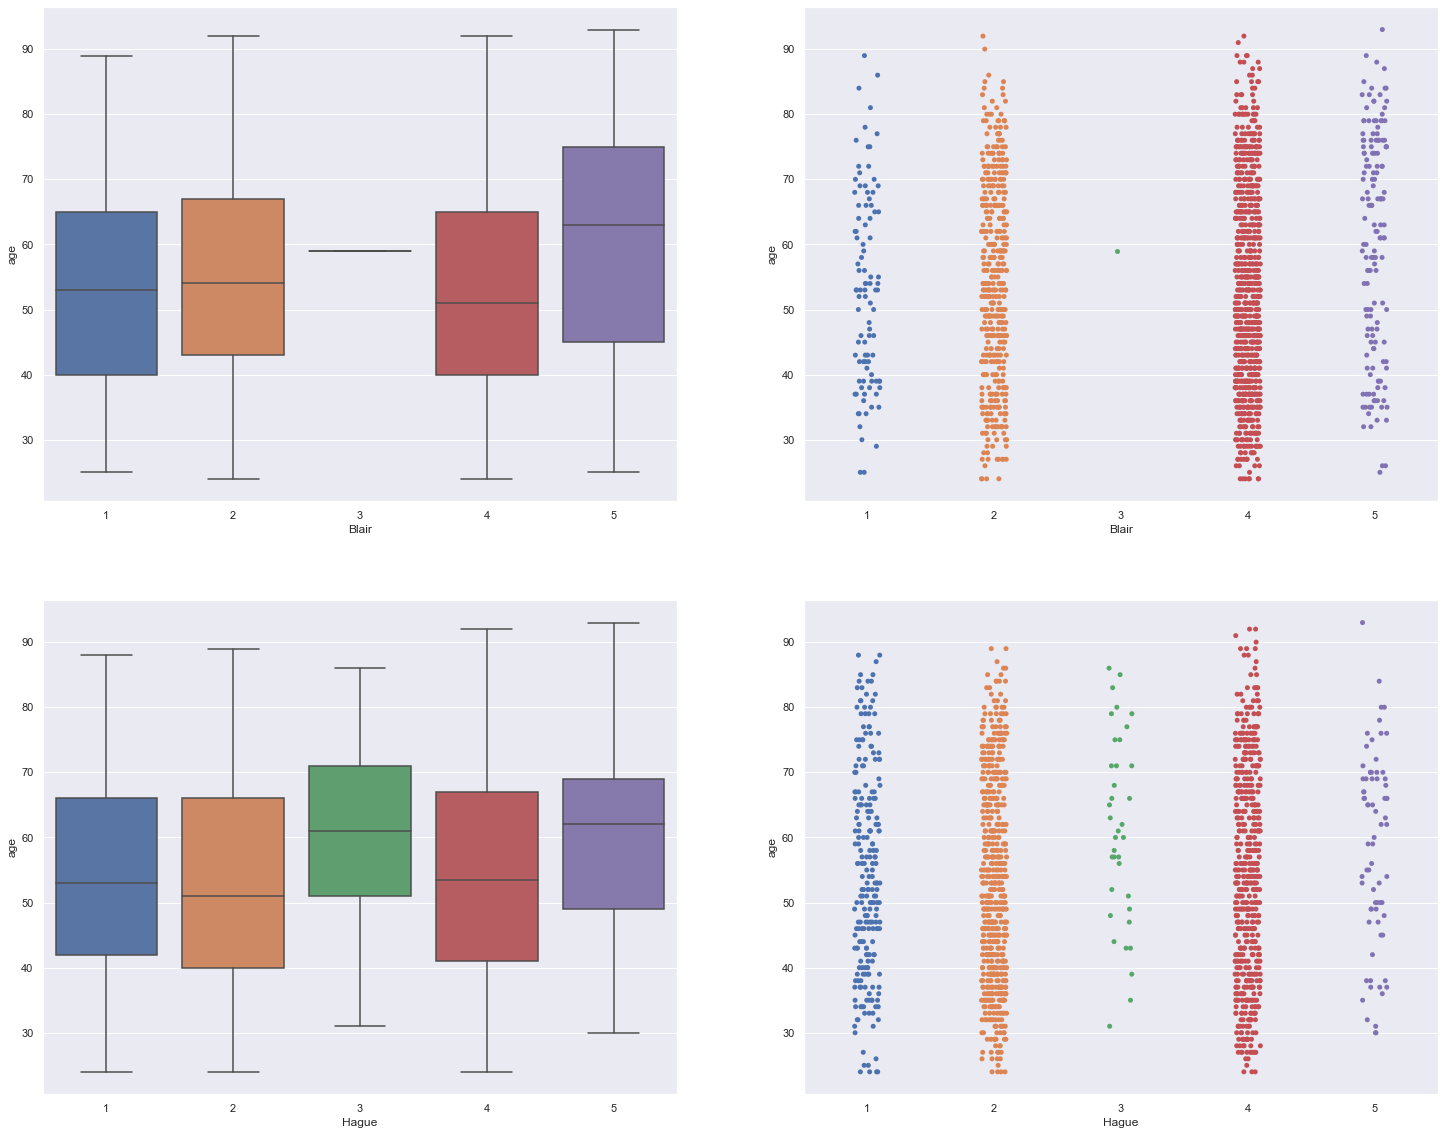

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sns.boxplot(election_data["Blair"],election_data["age"], ax = axes[0][0])
sns.stripplot(election_data["Blair"],election_data["age"], ax = axes[0][1])
sns.boxplot(election_data["Hague"],election_data["age"], ax = axes[1][0])
sns.stripplot(election_data["Hague"],election_data["age"], ax = axes[1][1])

<AxesSubplot:xlabel='Blair', ylabel='Count'>

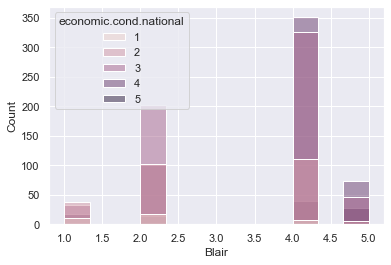

In [ ]:
sns.histplot(data =election_data , x = "Blair", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

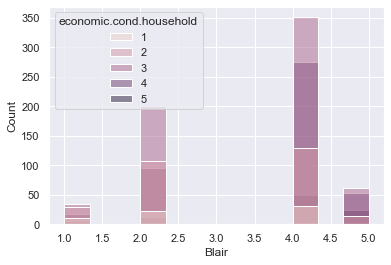

In [ ]:
sns.histplot(data =election_data , x = "Blair", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

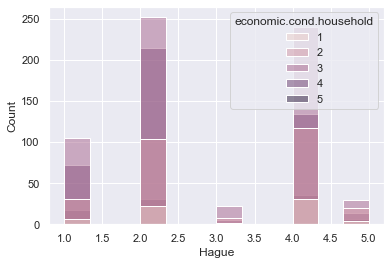

In [ ]:
sns.histplot(data =election_data , x = "Hague", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

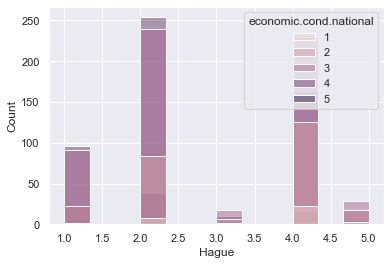

In [ ]:
sns.histplot(data =election_data , x = "Hague", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

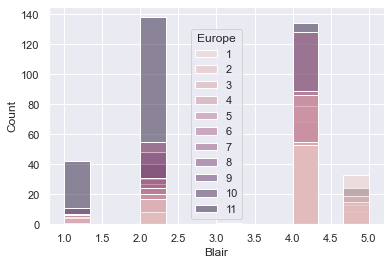

In [ ]:
sns.histplot(data =election_data , x = "Blair", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

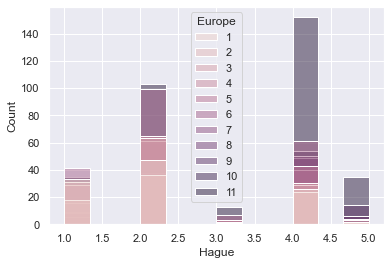

In [ ]:
sns.histplot(data =election_data , x = "Hague", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

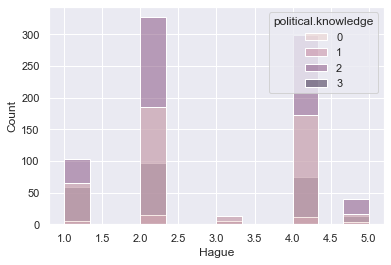

In [ ]:
sns.histplot(data =election_data , x = "Hague", hue = "political.knowledge")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

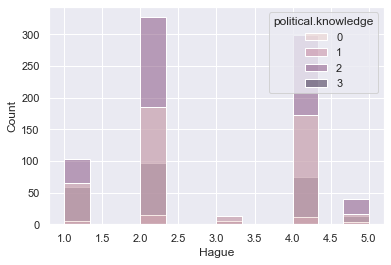

In [ ]:
sns.histplot(data =election_data , x = "Hague", hue = "political.knowledge")

In [ ]:
covMatrix = np.cov(election_data,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


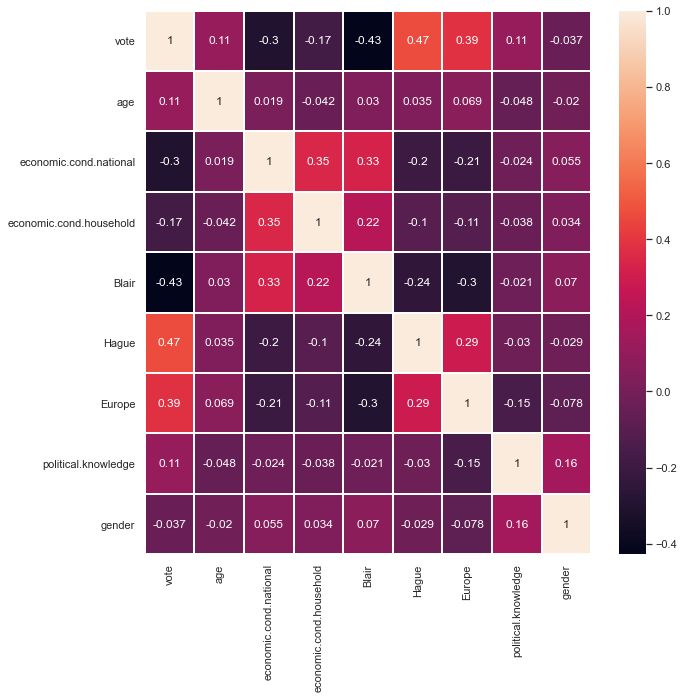

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(election_data.corr(), annot=True,linewidth = 1)

# Q3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(election_data[['gender','vote']])
scaled

array([[0., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 1.],
       [0., 1.]])

In [ ]:
election_data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,0,43,3,3,4,1,2,2,0
2,0,36,4,4,4,4,5,2,1
3,0,35,4,4,5,2,3,2,1
4,0,24,4,2,2,1,4,0,0
5,0,41,2,2,1,1,6,2,1


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
x = election_data.drop("vote",axis = 1)
y = election_data.pop("vote")

In [ ]:
#x = np.linspace(0, 2*np.pi, 8)
#y = np.sin(x) + np.random.normal(0, 0.4, 8)

In [ ]:
#x = x.reshape(-1, 1)

In [ ]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

# Apply Logistic Regression and LDA (Linear Discriminant Analysis)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [ ]:
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000, random_state=0)

In [ ]:
y_train_predict=lr.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [ ]:
confusion_matrix(y_train,y_train_predict)

array([[667,  68],
       [103, 229]], dtype=int64)

AxesSubplot(0.125,0.125;0.62x0.755)


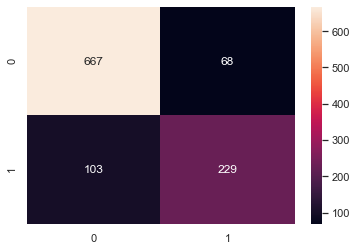

In [ ]:

print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [ ]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16026241799437677


In [ ]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17685589519650655


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.889


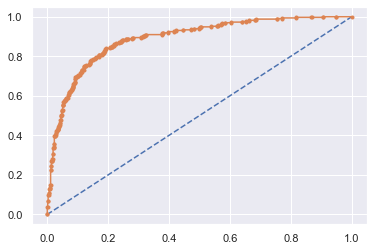

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.882


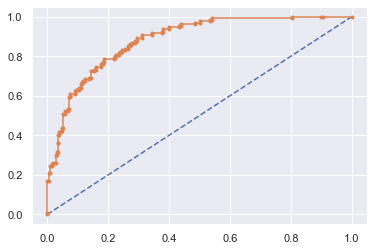

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Linear Discriminant Analysis

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda = lda.fit(x_train,y_train)

In [ ]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[660  99]
 [ 75 233]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       759
           1       0.70      0.76      0.73       308

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [ ]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[289  44]
 [ 39  86]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       333
           1       0.66      0.69      0.67       125

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


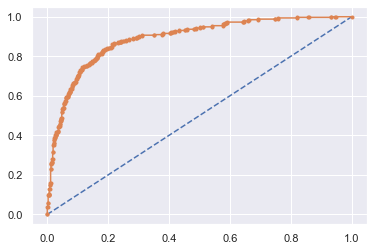

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.884


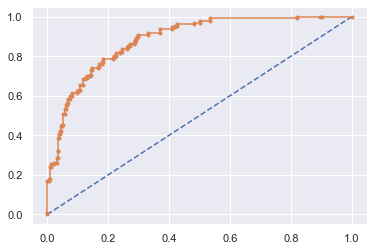

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q5)Apply KNN Model and Naïve Bayes Model. Interpret the results.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn = knn.fit(x_train,y_train)

In [ ]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.7860262008733624

In [ ]:
print(confusion_matrix(knn.predict(x_train),y_train))


[[673  86]
 [ 62 246]]


In [ ]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



AUC: 0.924


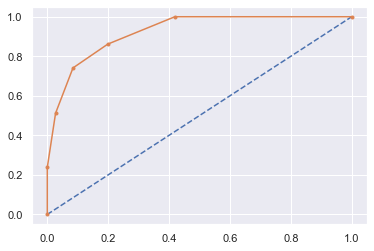

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.832


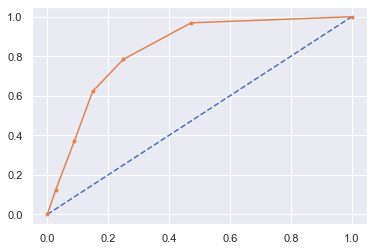

In [ ]:

# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb= nb.fit(x_train, y_train)

In [ ]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[649  92]
 [ 86 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [ ]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[284  36]
 [ 44  94]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       320
           1       0.72      0.68      0.70       138

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



AUC: 0.886


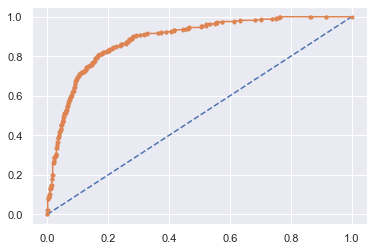

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.885


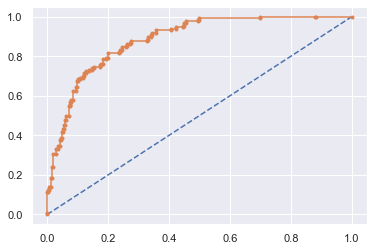

In [ ]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q6)Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [ ]:
XGBoost=XGBClassifier()

In [ ]:
grid_search=GridSearchCV(estimator=XGBoost,param_grid=param_grid,error_score='raise')

In [ ]:
grid_search.fit(x_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(x_test._get_numeric_data())

[22:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

[22:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed d

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
ADB_model=grid_search.best_estimator_

In [ ]:
ADB_model.fit(x_train,y_train)

[22:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "algorithm" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:40:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(algorithm='SAMME', base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.950328022492971
[[718  17]
 [ 36 296]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       735
           1       0.95      0.89      0.92       332

    accuracy                           0.95      1067
   macro avg       0.95      0.93      0.94      1067
weighted avg       0.95      0.95      0.95      1067



AUC: 0.986


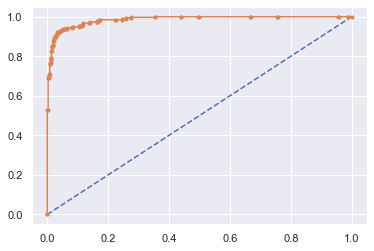

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8100436681222707
[[278  50]
 [ 37  93]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       328
           1       0.65      0.72      0.68       130

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.81      0.81       458



AUC: 0.879


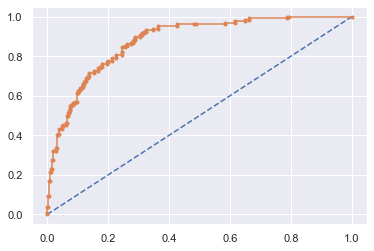

In [ ]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [ ]:
DT_model= DecisionTreeClassifier()

In [ ]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [ ]:
DT_model=grid_search.best_estimator_

In [ ]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [ ]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.837863167760075
[[663  72]
 [101 231]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.896


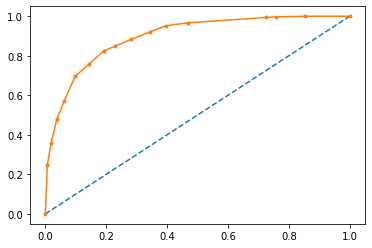

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8144104803493449
[[285  43]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC: 0.870


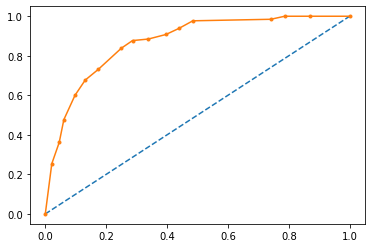

In [ ]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [ ]:

RF_model=RandomForestClassifier()

In [ ]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [ ]:
RF_model=grid_search.best_estimator_

In [ ]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8556701030927835
[[686  49]
 [105 227]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       735
           1       0.82      0.68      0.75       332

    accuracy                           0.86      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.86      0.85      1067



AUC: 0.915


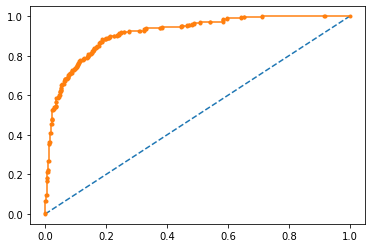

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8296943231441049
[[291  37]
 [ 41  89]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       328
           1       0.71      0.68      0.70       130

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.898


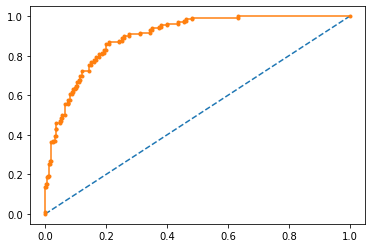

In [ ]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()